In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('kidney.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
categorical_data = df.select_dtypes(exclude=[np.number])
for i in categorical_data:
    print(categorical_data[i].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++++++++')

normal      201
abnormal     47
Name: rbc, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++
normal      259
abnormal     76
Name: pc, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++
notpresent    354
present        42
Name: pcc, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++
notpresent    374
present        22
Name: ba, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++
41      21
52      21
48      19
44      19
40      16
43      14
42      13
45      13
33      12
32      12
50      12
36      12
28      12
37      11
34      11
30       9
35       9
46       9
29       9
31       8
39       7
24       7
26       6
38       5
54       4
49       4
53       4
47       4
51       4
25       3
27       3
22       3
19       2
23       2
17       1
\t43     1
\t?      1
18       1
15       1
16       1
14       1
9        1
20       1
21       1
Name: pcv, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++
9800     11
6700     1

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df['classification'].fillna(method='ffill', inplace=True)

In [7]:
df.drop_duplicates()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

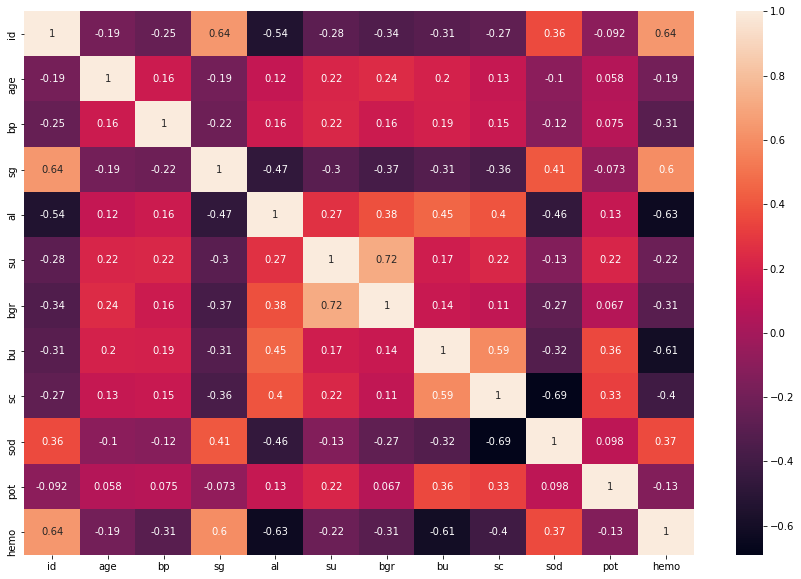

In [9]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
df['age']=df['age'].fillna(df.age.median())

In [11]:
df['bp']=df['bp'].fillna(df['bp'].mean())

In [12]:
df['sg']=df['sg'].fillna(df['sg'].median())

In [13]:
df['al']=df['al'].fillna(df['al'].mean())

In [14]:
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
df['su']=df['su'].fillna(df['su'].median())

In [16]:
df['bgr']=df['bgr'].fillna(df['bgr'].median())

In [17]:
df['bu']=df['bu'].fillna(df['bu'].median())

In [18]:
df['sc']=df['sc'].fillna(df['sc'].mean())

In [19]:
col=['sod','pot','hemo']           
for i in col:
    x=df[i].mean()
    df[i]=df[i].fillna(x)

In [20]:
df.isna().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_cols = categorical_data.columns.values
print(categorical_cols)

['rbc' 'pc' 'pcc' 'ba' 'pcv' 'wc' 'rc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'classification']


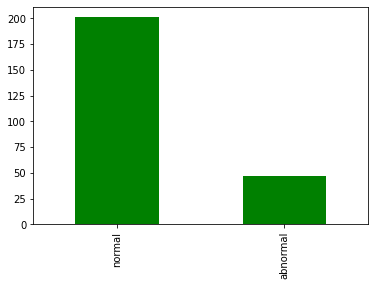

In [22]:
df['rbc'].value_counts().plot.bar(color='green')

In [23]:
df['rbc'].fillna(method='ffill', inplace=True)

In [24]:
df['rbc'].isnull().sum()

2

In [25]:
df['rbc'].fillna('normal', inplace=True)

In [26]:
df['pc'].fillna(method='ffill', inplace=True)

In [27]:
df['pcc'].fillna(method='ffill', inplace=True)

In [28]:
df['ba'].fillna(method='ffill', inplace=True)

In [29]:
df['htn'].fillna(method='ffill', inplace=True)

In [30]:
df['dm'].fillna(method='ffill', inplace=True)

In [31]:
df['cad'].fillna(method='ffill', inplace=True)

In [32]:
df['appet'].fillna(method='ffill', inplace=True)

In [33]:
df['pe'].fillna(method='ffill', inplace=True)

In [34]:
df['ane'].fillna(method='ffill', inplace=True)

In [35]:
df.pcv.fillna(method='ffill', inplace=True)

In [36]:
df['wc'].fillna(method="ffill",inplace=True)

In [37]:
df['rc'].fillna(method="ffill",inplace=True)

In [38]:
Y=df['classification']


In [39]:
X=df.drop(["classification","id"],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
# Here I made a transformation of the target column.
le=LabelEncoder()
y=le.fit_transform(Y)
le=LabelEncoder()
# During the conversion process, we used the first projection.
for i in X.select_dtypes(exclude=[np.number]).columns:
    X[i] = le.fit_transform(df[i])

In [41]:
for i in X.columns:
    print(X[i].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++++++++==========')

55.0    21
60.0    19
65.0    17
48.0    12
50.0    12
        ..
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++==========
80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
120.000000      1
180.000000      1
140.000000      1
Name: bp, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++==========
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++==========
0.000000    199
1.016949     46
1.000000     44
3.000000     43
2.000000     43
4.000000     24
5.000000      1
Name: al, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++==========
0.0    339
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++==========
1    291
0    109
Na

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
knc = KNeighborsClassifier(n_neighbors = 25)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()

In [47]:
models = [lr, knc, dtc, rfc, svc, xgb, abc]
models_name = ['Logistic Regression', "K Neighbor Classifier", "Decision Tree Classifier", 'Random Forest Classifier','Support Vector Classifier', 'XGBoost Classifier','ADABoost Classifier']

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 1000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('rfc',rfc))
estimator.append(('KNN',knc))
estimator.append(('adaboost',abc))
  
# Voting Classifier with hard voting
vote= VotingClassifier(estimators = estimator,weights = [1,1],voting='soft')


In [50]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,32,72,34,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,26,56,34,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,19,70,34,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,20,62,19,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,23,68,27,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,35,62,30,0,3,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,42,72,44,0,3,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,37,61,36,0,3,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,39,67,41,0,3,1,0,0,0


In [51]:
for clf in(lr,svc,dtc,rfc,knc,abc):
    clf.fit(x_train,Y_train)
    ypred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(Y_test,ypred))


LogisticRegression 0.975
SVC 0.9875
DecisionTreeClassifier 0.9875
RandomForestClassifier 0.9875
KNeighborsClassifier 0.95
AdaBoostClassifier 0.9125


In [52]:
dtc=DecisionTreeClassifier()

In [53]:
dtc.fit(x_train,Y_train)

DecisionTreeClassifier()

In [54]:
ypred=dtc.predict(x_test)

In [55]:
acc=accuracy_score(Y_test,ypred)

In [56]:
acc

1.0

In [57]:
cm=confusion_matrix(Y_test,ypred)

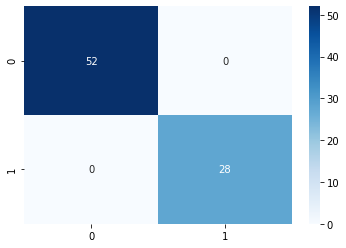

In [58]:
sns.heatmap(cm,cmap='Blues',annot=True)

In [59]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [61]:
import pickle
file=open('Kidney.pkl','wb')
pickle.dump(dtc,file)